# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [54]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


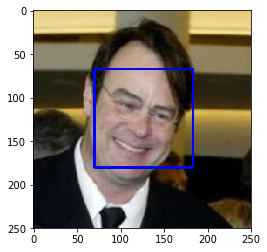

In [55]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [56]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [57]:
from tqdm import tqdm

short_list = 100
human_files_short = human_files[:short_list]
dog_files_short = dog_files[:short_list]

#-#-# Do NOT modify the code above this line. #-#-#

## DONE: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_pct = sum([face_detector(image) for image in human_files_short])/short_list * 100
dog_pct = sum([face_detector(image) for image in dog_files_short])/short_list * 100

print('Percentage of 100 first human images detected as human:', human_pct, '%')
print('Percentage of 100 first dog images detected as human:', dog_pct, '%')

Percentage of 100 first human images detected as human: 98.0 %
Percentage of 100 first dog images detected as human: 17.0 %


In [58]:
dog_files_short[0]

'/data/dog_images/train/103.Mastiff/Mastiff_06833.jpg'

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [59]:
import torch
from torchvision import models, transforms, datasets

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [68]:
from PIL import Image
# from PIL import ImageFile
# # set PIL to be tolerant of truncated image files
# ImageFile.LOAD_TRUNCATED_IMAGES = True

def process_image(img_path):
    # open un-processed image 
    image = Image.open(img_path)
    
    # set tranforms to image to prep it for VGG16 model prediction
    adjust = transforms.Compose([transforms.Resize(size=(244, 244)),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                    std=[0.229, 0.224, 0.225])])
    
    # apply tranforms to process the image
    proc_image = adjust(image)[:3,:,:].unsqueeze(0)
    
    return proc_image

In [61]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## DONE: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    image = process_image(img_path)
    # check for GPU availability and use if available
    if use_cuda:
        image = image.cuda()
    # set model to eval() mode
    VGG16.eval()    
    # run image through VGG16 model for prediction
    prediction = VGG16(image)
    # copy CUDA tensor to host memory
    prediction = prediction.cpu()
    # convert prediction to numpy array and find max value
    pred_class_idx = prediction.data.numpy().argmax()
#     print(pred_class_idx, 'is the predicted class index number')
#     print('Predicted image path=', img_path)
    
    return pred_class_idx

In [62]:
# test our prediction
VGG16_predict(dog_files_short[0])

243

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [63]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## DONE: Complete the function.
    if 151 <= VGG16_predict(img_path) <= 268:
        return True
    else:
        return False

In [64]:
print(dog_detector(dog_files_short[0]))
print(dog_detector(human_files_short[0]))

True
False


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [55]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_face_count = 0
dog_face_count = 0

for n in human_files_short:
    if dog_detector(n):
        human_face_count += 1
        
for n in dog_files_short:
    if dog_detector(n):
        dog_face_count += 1 

print('Detected dog in human_files: {0}%'.format((human_face_count/len(human_files_short)*100)))
print('Detected dog in dog_files: {0}%'.format((dog_face_count/len(dog_files_short)*100)))

Detected dog in human_files: 0.0%
Detected dog in dog_files: 100.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [7]:
import os
from torchvision import datasets, transforms
from PIL import ImageFile

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes


data_dir = '/data/dog_images'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# Transform data to prepare for training
# print("Transforming and organizing data to prepare it for training...")
train_transforms = transforms.Compose([transforms.RandomRotation(20),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_valid_transforms = transforms.Compose([transforms.Resize(256),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406],
                                                                 [0.229, 0.224, 0.225])])

# Load the transformed datasets with ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
valid_data = datasets.ImageFolder(valid_dir, transform=test_valid_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_valid_transforms)

# define dataloader parameters
batch_size = 20
num_workers = 0

# Using the transformed datasets, define the dataloaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

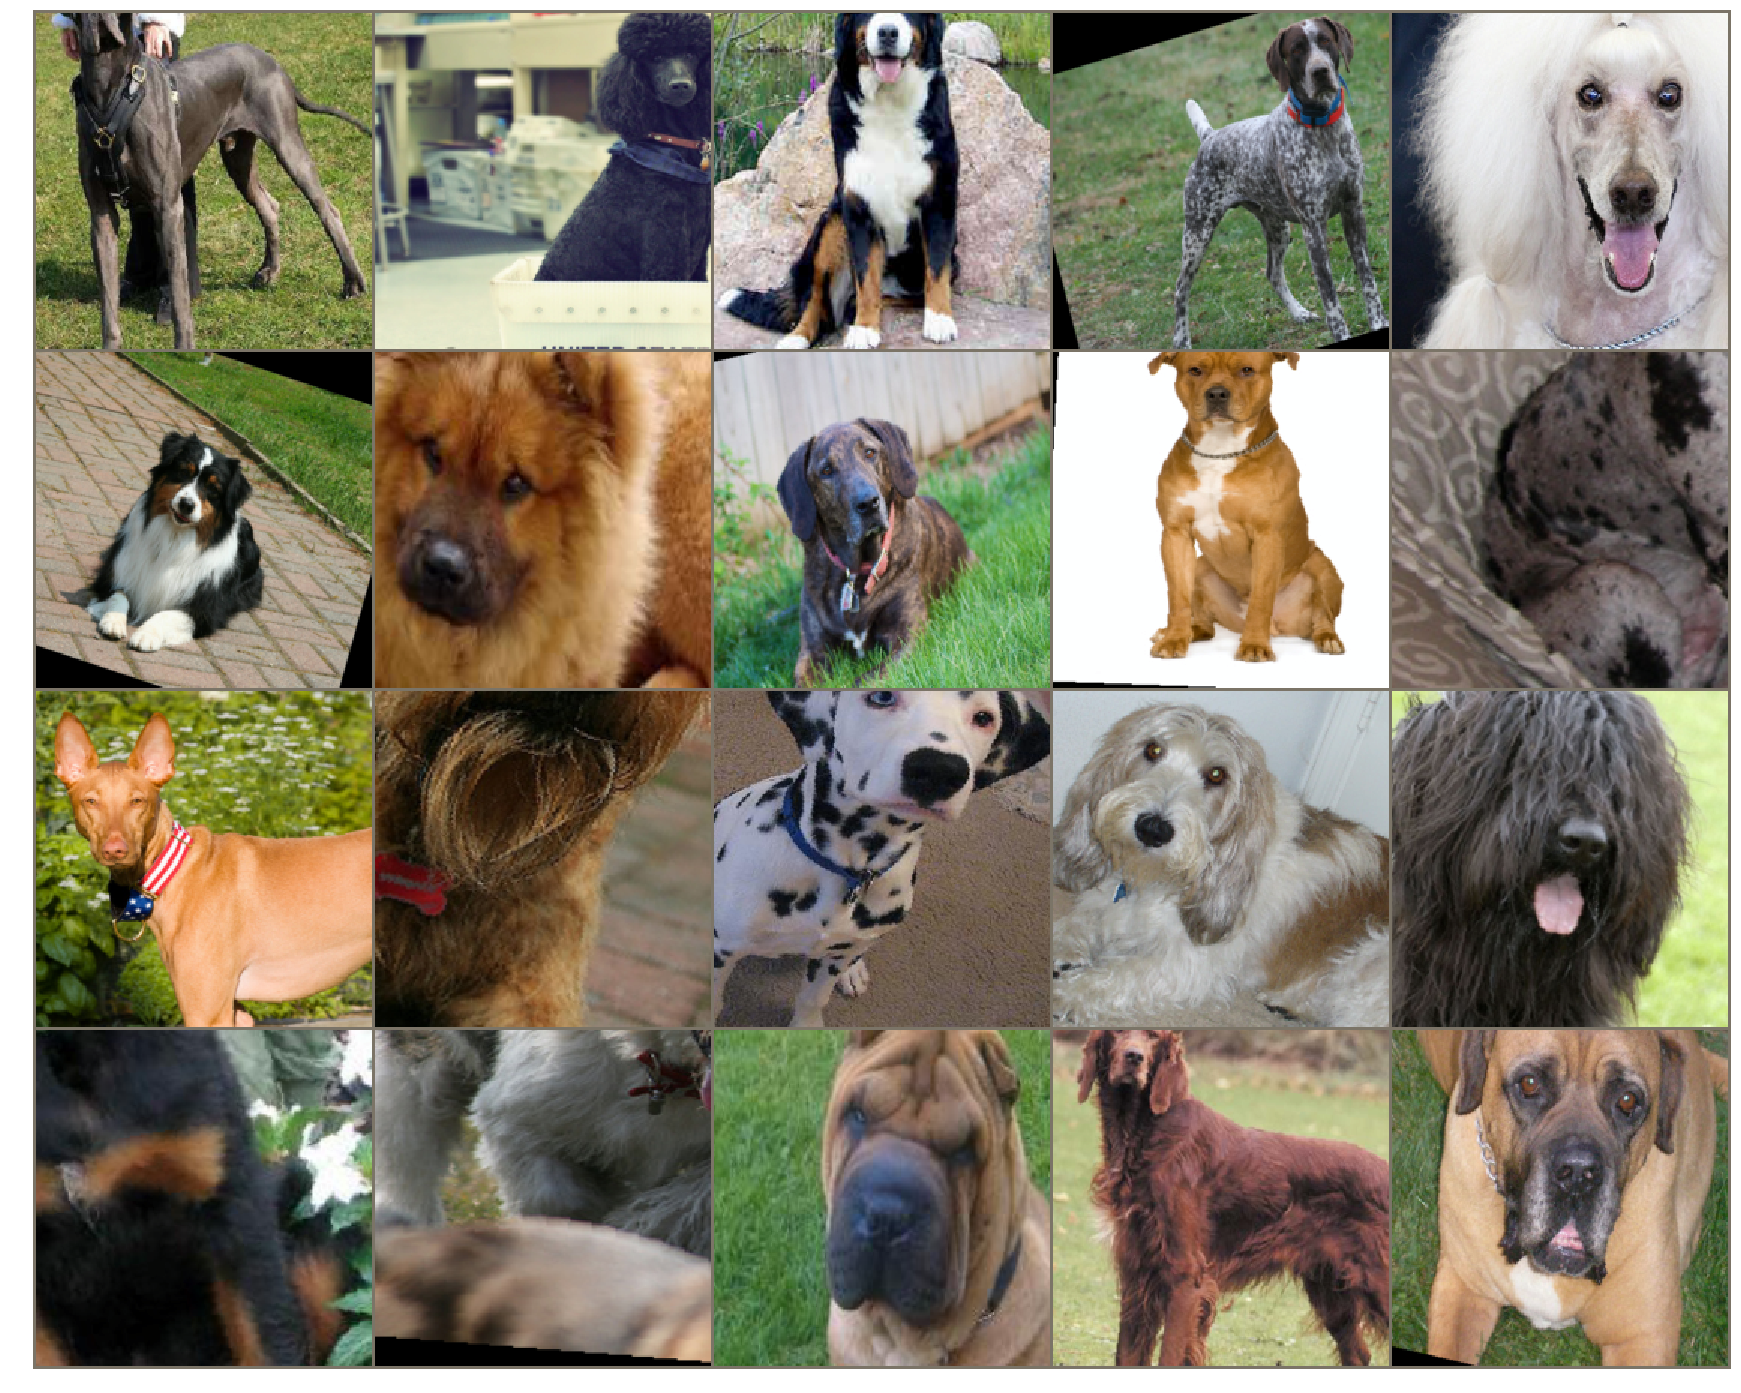

In [82]:
from torchvision import utils
import numpy as np

def visualize_sample_images(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = inp * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    inp = np.clip(inp, 0, 1)
    
    fig = plt.figure(figsize=(60, 25))
    plt.axis('off')
    plt.imshow(inp)
    plt.pause(0.001)
    
# grab a set of training data.    
inputs, classes = next(iter(train_loader))
# convert batch to grid
img_grid = utils.make_grid(inputs, nrow=5)
# display batch 
visualize_sample_images(img_grid)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: Resize is done with the torchvision transform functionality - with Resize() and Centercrop() - this is simple and I've used it before with VGG16. I augmented with RandomRotation(), RandomResizeCrop() and RandomHorizontalFlip() to give the training data more variety and a better chance for success with inference to achieve 10% or greater accuracy.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [90]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        # Convolutional Layers
        self.conv1 = nn.Conv2d(3, 32, 3, stride=2, padding=1) #layer input=224x224x3 | output=112x112x32
        # output pooled=56x56x32
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1) #layer input=56x56x32 | ouput=28x28x64
        # output pooled=14x14x64
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1) #layer input=14x14x64 | output pooled=7x7x128
        
        # Max Pooling Layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Fully Connected Linear Layers
        # input 7x7x128, ouput 500
        self.fc1 = nn.Linear(7*7*128, 512)
        # input 500, output classes 133 total
        self.fc2 = nn.Linear(512, 133)
        
        # Dropout layer
        self.dropout = nn.Dropout(0.25)
        
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        # Flatten the image
        x = x.view(-1, 7*7*128)
        # Dropout layer
        x = self.dropout(x)
        # fc1 with activation
        x = F.relu(self.fc1(x))
        # Dropout layer
        x = self.dropout(x)
        # fc2 - activation applied by CrossEntropyLoss
        x = self.fc2(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ Google research indicated that a simple CNN with a 2x2 kernel, stride=2, and padding=1 with simple Maxpool of (2,2) would handle a breed classification problem like this quite well. I have experience with VGG16 and have used the Relu activation function with success in the past, so I utilized that. Dropout is important to keep the model from overfitting, I typically use between 0.2 and 0.3, so went with the 0.25 as a starting point. I commented each line of the model to remind myself what the shape of the input/output tensor is as it propogates through the network. Final ouput will yield 133 classes with probabilities from 0 to .99. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [91]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [93]:
def train(n_epochs, train_loader, valid_loader, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear gradients from previous pass - this is NOT a weight initialization - this is a gradient reset
            optimizer.zero_grad()
            ## forward pass thru model
            output = model(data)
            # calculate loss
            loss = criterion(output, target)
            # backpropogate to calculate the loss thru the network
            loss.backward()
            # update weights and biases based on the gradients
            optimizer.step()
            # update training loss 
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
                        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(valid_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass to predict output in eval mode
            output = model(data)
            # calculate loss 
            loss = criterion(output, target)
            # update average validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        
#         # calculate average losses for training and validation
#         train_loss = train_loss/len(train_loader.sampler)
#         valid_loss = valid_loss/len(valid_loader.sampler)
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving Model...'.format(
            valid_loss_min,
            valid_loss))
            
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(20, train_loader, valid_loader, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.670394 	Validation Loss: 4.536934
Validation loss decreased (inf --> 4.536934). Saving Model...
Epoch: 2 	Training Loss: 4.579018 	Validation Loss: 4.410564
Validation loss decreased (4.536934 --> 4.410564). Saving Model...
Epoch: 3 	Training Loss: 4.519466 	Validation Loss: 4.318916
Validation loss decreased (4.410564 --> 4.318916). Saving Model...
Epoch: 4 	Training Loss: 4.462058 	Validation Loss: 4.283389
Validation loss decreased (4.318916 --> 4.283389). Saving Model...
Epoch: 5 	Training Loss: 4.407757 	Validation Loss: 4.218861
Validation loss decreased (4.283389 --> 4.218861). Saving Model...
Epoch: 6 	Training Loss: 4.330658 	Validation Loss: 4.092863
Validation loss decreased (4.218861 --> 4.092863). Saving Model...
Epoch: 7 	Training Loss: 4.291344 	Validation Loss: 4.045519
Validation loss decreased (4.092863 --> 4.045519). Saving Model...
Epoch: 8 	Training Loss: 4.209840 	Validation Loss: 4.009089
Validation loss decreased (4.045519 --> 4.009089

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [94]:
def test(test_loader, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(test_loader):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(test_loader, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.644988


Test Accuracy: 14% (118/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [ ]:
## DONE: Specify data loaders - use the same dataloaders from previous CNN

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [2]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

# avoid calculating gradient for pretrained model
for param in model_transfer.parameters():
    param.requires_grad = False

# create new fully connected classifier layer 
model_transfer.fc = nn.Linear(2048, 133)

# if use_cuda:
#     model_transfer = model_transfer.cuda()
    
print(model_transfer)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I googled pre-trained imagenet model options and found there are a LOT of options with various benefits and drawbacks. Resnet50 appears to be a stable option that provides better results than VGG16 (which I've used in past projects). It should have a strong set of pattern recognition features that will help us achieve greater than 60% accuracy on predictions. Set the model to freeze pretrained parameters, only the fc layer will be updated during training. Will use CUDA GPU for training. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [3]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [99]:
# train the model
model_transfer = train(10, train_loader, valid_loader, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.819768 	Validation Loss: 4.650974
Validation loss decreased (inf --> 4.650974). Saving Model...
Epoch: 2 	Training Loss: 4.615237 	Validation Loss: 4.413607
Validation loss decreased (4.650974 --> 4.413607). Saving Model...
Epoch: 3 	Training Loss: 4.435632 	Validation Loss: 4.183116
Validation loss decreased (4.413607 --> 4.183116). Saving Model...
Epoch: 4 	Training Loss: 4.253153 	Validation Loss: 3.969041
Validation loss decreased (4.183116 --> 3.969041). Saving Model...
Epoch: 5 	Training Loss: 4.087219 	Validation Loss: 3.774726
Validation loss decreased (3.969041 --> 3.774726). Saving Model...
Epoch: 6 	Training Loss: 3.932218 	Validation Loss: 3.558104
Validation loss decreased (3.774726 --> 3.558104). Saving Model...
Epoch: 7 	Training Loss: 3.784500 	Validation Loss: 3.371339
Validation loss decreased (3.558104 --> 3.371339). Saving Model...
Epoch: 8 	Training Loss: 3.632071 	Validation Loss: 3.198140
Validation loss decreased (3.371339 --> 3.198140

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [100]:
test(test_loader, model_transfer, criterion_transfer, use_cuda)

Test Loss: 2.815501


Test Accuracy: 62% (522/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [5]:
import torch
# Load the trained model 'model_transfer.pt'
model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location='cpu'))

In [32]:
from PIL import Image
from torchvision import models, transforms, datasets

### DONE: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def load_input_image(img_path):    
    image = Image.open(img_path)
    pred_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                        transforms.ToTensor(), 
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std=[0.229, 0.224, 0.225])])

    # remove alpha channel :3 and add batch dim
    image = pred_transform(image)[:3,:,:].unsqueeze(0)
    return image

def predict_breed_transfer(model, img_path):
    # load the image and return the predicted breed
    # load and process image for prediction
    image = load_input_image(img_path)
    # set model to eval() mode
    model_transfer.eval()    
    # run image through model to generate prediction
    prediction = model_transfer(image)
    # copy CUDA tensor to host memory
    prediction = prediction.cpu()
    # convert prediction to numpy array and find max value
    pred_idx = prediction.data.numpy().argmax()
    
    return pred_idx, class_names[pred_idx]

In [33]:
import os

for img_file in os.listdir('./images'):
    img_path = os.path.join('./images', img_file)
    prediction = predict_breed_transfer(model_transfer, img_path)
    print("image_file_name: {0}, \n predition breed: {1} \n".format(img_path, prediction))

image_file_name: ./images/American_water_spaniel_00648.jpg, 
 predition breed: (54, 'Curly-coated retriever') 

image_file_name: ./images/Labrador_retriever_06455.jpg, 
 predition breed: (71, 'German shorthaired pointer') 

image_file_name: ./images/Welsh_springer_spaniel_08203.jpg, 
 predition breed: (14, 'Basset hound') 

image_file_name: ./images/Labrador_retriever_06449.jpg, 
 predition breed: (67, 'Flat-coated retriever') 

image_file_name: ./images/sample_cnn.png, 
 predition breed: (5, 'American eskimo dog') 

image_file_name: ./images/Labrador_retriever_06457.jpg, 
 predition breed: (59, 'Dogue de bordeaux') 

image_file_name: ./images/Curly-coated_retriever_03896.jpg, 
 predition breed: (54, 'Curly-coated retriever') 

image_file_name: ./images/sample_dog_output.png, 
 predition breed: (80, 'Greyhound') 

image_file_name: ./images/Brittany_02625.jpg, 
 predition breed: (36, 'Brittany') 

image_file_name: ./images/sample_human_output.png, 
 predition breed: (59, 'Dogue de borde

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [65]:
import numpy
import cv2

# returns "True" if face is detected in image stored at img_path
def face_detector_transfer(img_path):
    # extract pre-trained face detector
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### returns "True" if a dog is detected in the image stored at img_path
def dog_detector_transfer(img_path):
    ## DONE: Complete the function.
    if 151 <= VGG16_predict(img_path) <= 268:
        return True
    else:
        return False

In [72]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()    
    if dog_detector_transfer(img_path) is True:
        prediction = predict_breed_transfer(model_transfer, img_path)
        print("Dog has been detected. \nModel predicts it to be a {0}".format(prediction[1]))
    elif face_detector_transfer(img_path) is True:
        prediction = predict_breed_transfer(model_transfer, img_path)
        print("Human has been detected. \nYour dog-doppelganger is {0}".format(prediction[1]))
    else:
        print("Welp, sorry, looks like we didn't detect a dog or a human.")


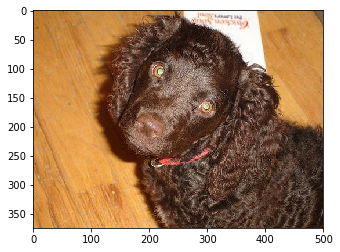

Dog has been detected. 
Model predicts it to be a Curly-coated retriever


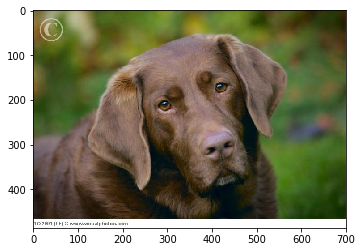

Dog has been detected. 
Model predicts it to be a German shorthaired pointer


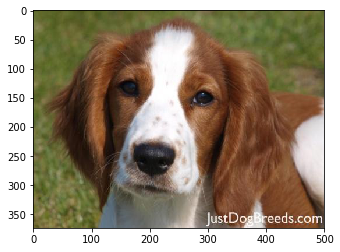

Dog has been detected. 
Model predicts it to be a Basset hound


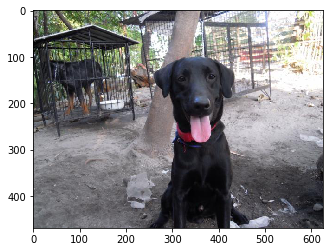

Dog has been detected. 
Model predicts it to be a Flat-coated retriever


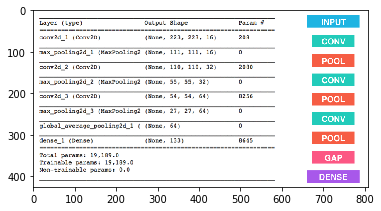

Welp, sorry, looks like we didn't detect a dog or a human.


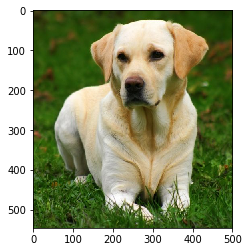

Dog has been detected. 
Model predicts it to be a Dogue de bordeaux


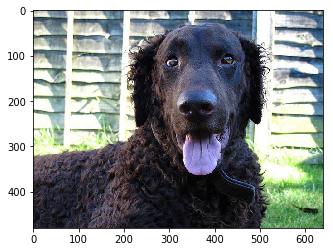

Dog has been detected. 
Model predicts it to be a Curly-coated retriever


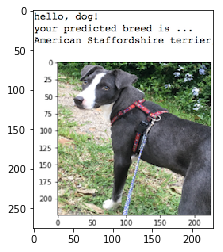

Dog has been detected. 
Model predicts it to be a Greyhound


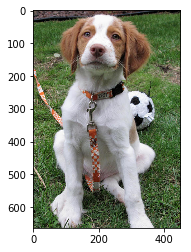

Dog has been detected. 
Model predicts it to be a Brittany


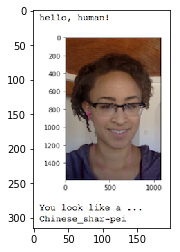

Human has been detected. 
Your dog-doppelganger is Dogue de bordeaux


In [73]:
for img_file in os.listdir('./images'):
    img_path = os.path.join('./images', img_file)
    run_app(img_path)

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The prediction output is not very accurate (although it met the specifications defined in this exercise). To improve the accuracy, I would work on the following 3 points;
1. More training time. I believe more GPU training time would result in significant improvements. 
2. Test alternative pre-trained models. In research it looks like Inception might be a better model for this problem, but that would need to be loaded, tested and results compared with the resnet model I used.
3. I would consider adding another fully connected layer to the classifier, to see if that gives the model more predictive ability on top of the pre-trained model. 

In [76]:
my_test_images = ['./test_images']
print(my_test_images)

['./test_images']


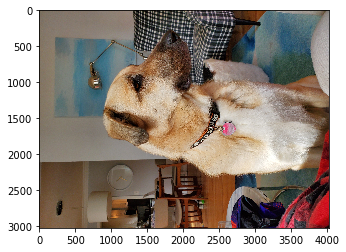

Human has been detected. 
Your dog-doppelganger is Chihuahua


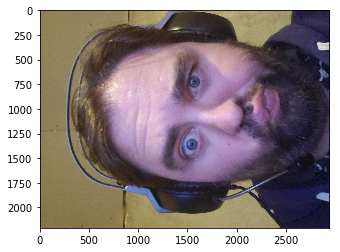

Human has been detected. 
Your dog-doppelganger is Italian greyhound


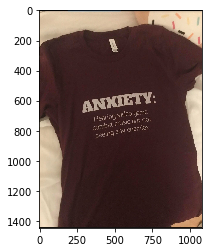

Welp, sorry, looks like we didn't detect a dog or a human.


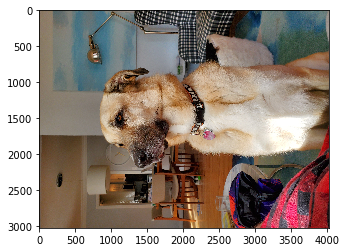

Dog has been detected. 
Model predicts it to be a Golden retriever


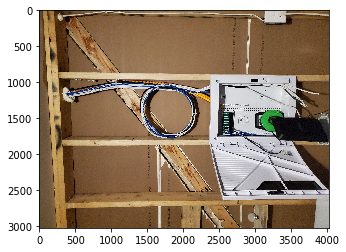

Human has been detected. 
Your dog-doppelganger is Irish setter


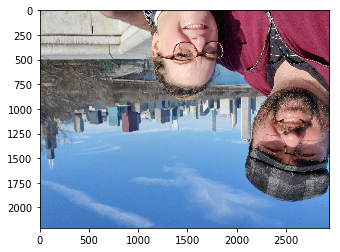

Human has been detected. 
Your dog-doppelganger is Bull terrier


In [77]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for img_file in os.listdir('./test_images'):
    img_path = os.path.join('./test_images', img_file)
    run_app(img_path)